# Going from Fourier Series to Fourier Transform

Based on notebooks available here: https://github.com/markjay4k/fourier-transform

### Last time we defined the Fourier Series as

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

### Let's look at the square wave centered at $x=0$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

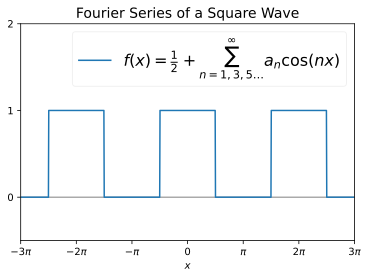

In [2]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

### But we didn't show how to calculate $a_n$

### Let's change our Fourier Series Equation

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

### where

$$
\omega_0 =\frac{2\pi}{T}
$$

### and $T$ is the fundamental period (for the square wave above, $T=2\pi$)

### The equation for $a_n$ is
$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

### For the square wave above, the limits are only $-T/4$ to $T/4$ because $f(x)=0$ for the rest of the wavelength.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

### Because $\cos(nx)$ is even, we can reduce the limits to $0$ to $T/4$ and multiply by $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

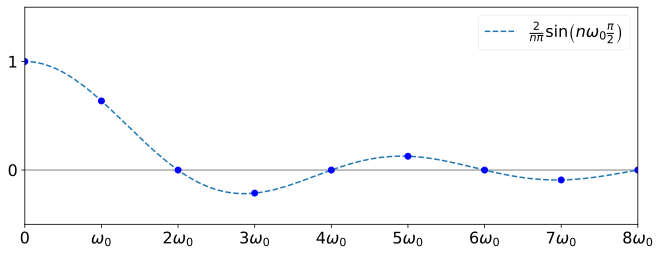

In [3]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### What if we make the squares farther apart by making $T=4\pi$ ?

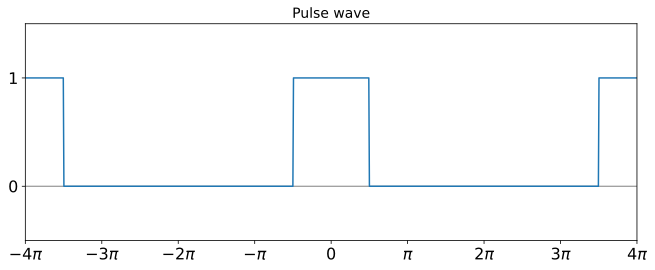

In [4]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

### The new fundamental frequency becomes $\omega'_0 =\omega_0/2$ 
### The $a_n$ coefficients become

$$
a_n = \frac{4}{n\omega'_0 T} \sin \left(n\omega'_0\frac{T}{8}\right)
$$

$$
a_n = \frac{2}{n\pi} \sin \left(n \omega'_0 \frac{\pi}{2} \right)
$$

### Since the fundametal frequency is cut in half, the spacing between coefficients are closer, but bound by the same envelope

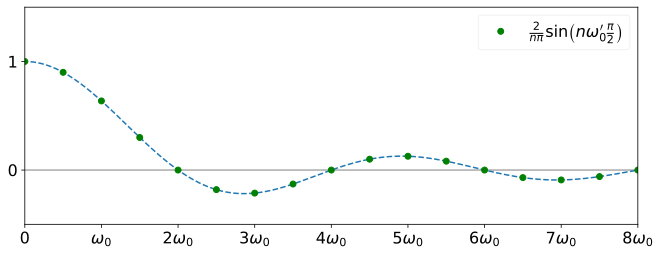

In [5]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### If $\omega_0' \rightarrow \omega_0/10$

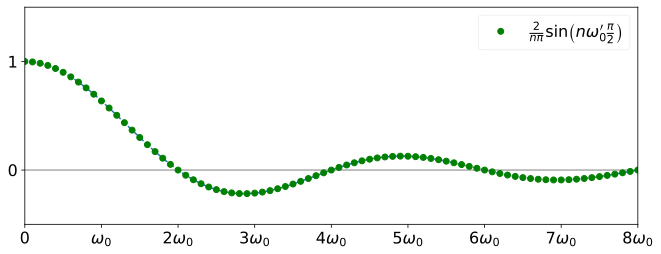

In [6]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
n = 0.1
nprime = np.arange(n, 10, n)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

In [1]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    B is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

<IPython.core.display.Javascript object>


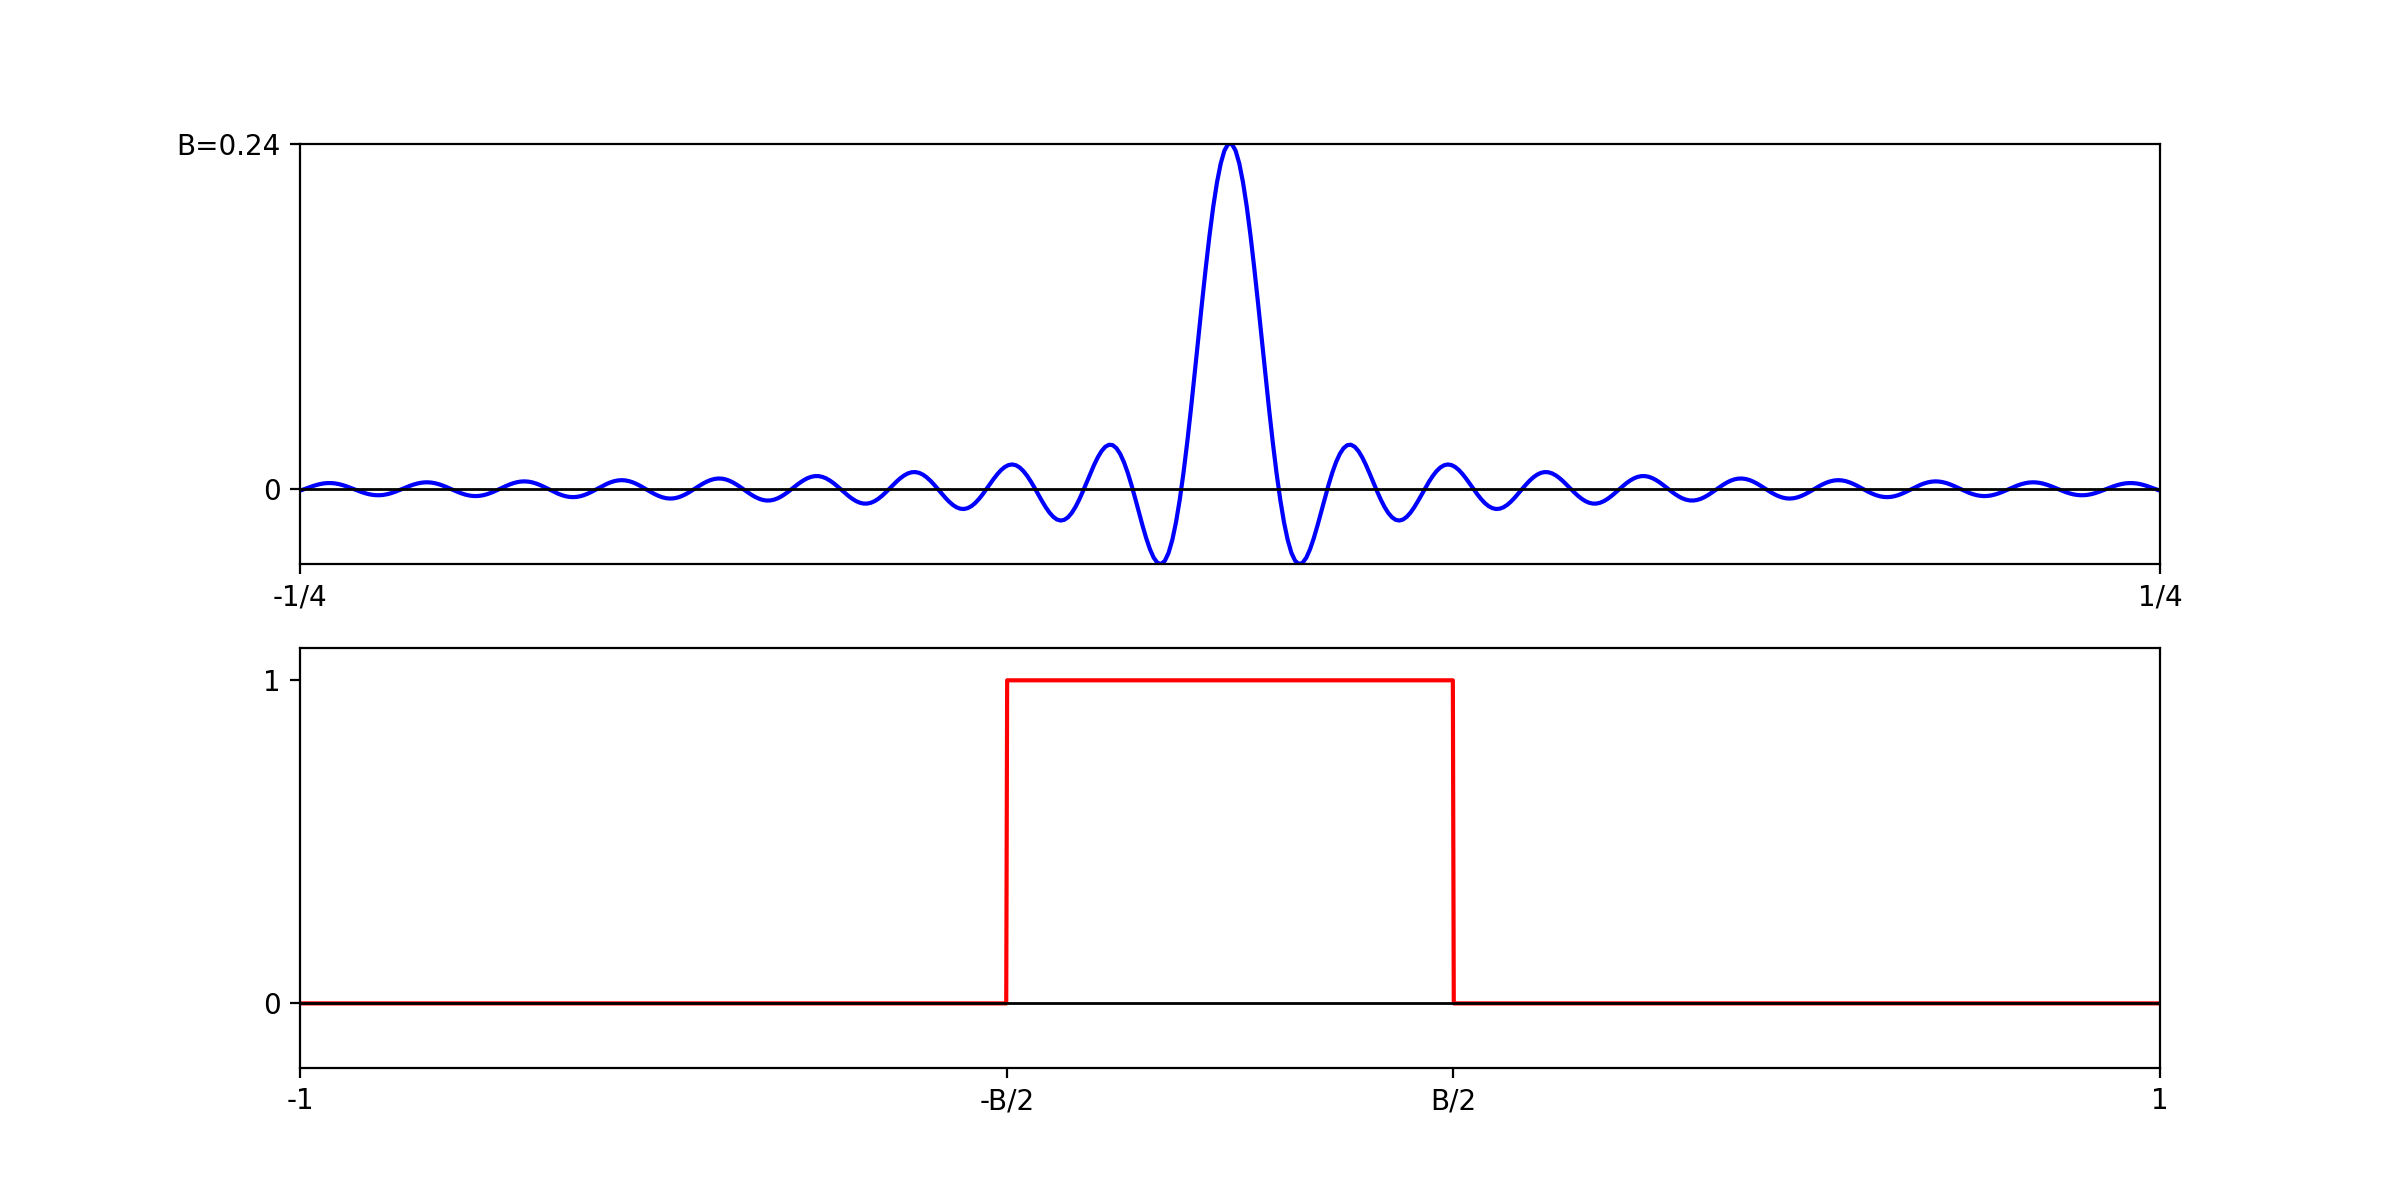

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.sin(x), '-b')
box, = ax2.plot(x, np.sin(x), '-r')

def animate(B):
    """
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: rect width
    
    return:
        sinc: ydata
        box: ydata
    """
    
    # create our rect object
    f = rect(len(x), B)
    box.set_ydata(f)
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
             yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
    # format the ax2 xticks to move with the box
    plt.setp(ax2, yticks=[0, 1], 
             xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, box,

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

### The Fourier Series becomes the Fourier Transform when
$$
T \rightarrow \infty, \qquad \omega_0 \rightarrow 0
$$

## Fourier Transform

1. Fourier Transform is a generalized version of the Fourier Series
2. It applies to both period and non periodic functions 
   - For periodic functions, the spectrum is discrete
   - For non-period functions, the spectrum is continuous 

### Definitions

#### Fourier Transform

Fourier Transform of $f(x)$ is $F(k)$
$$
F(k) = \mathcal{FT}\{f(x)\}
$$

$$
F(k) = \int_{-\infty}^{\infty}f(x) \exp(-ikx)dx
$$

where $k=\frac{2\pi}{x}$ is called the "wavenumber"

#### Inverse Fourier Transform

To go back to $f(x)$, the formula is

$$
f(x) = \mathcal{FT}^{-1}\{F(k)\}
$$

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty}F(k) \exp(ikx)dx
$$

Since $x$ and $k$ are inversely proportional, the "size" of $f(x)$ and $F(k)$ are inversely proportional. 
What this means is, 
 - a compact $f(x)$ will have a broad spectrum.
 - a broad $f(x)$ will have a compact spectrum

### Rectangle function

The $rext_B(x)$ function is a rectangle centered at $x=0$ with $\text{Height}=1$ and $\text{Width}=B$. The Formula can be written as 

$$
\text{rect}_B(x) =
\begin{cases}
0 & \text{if} \,\,\, |x| > B/2\\[2pt]
1/2 & \text{if} \,\,\, |x| = B/2 \\[2pt]
1 & \text{if} \,\,\, |x| < B/2
\end{cases}
$$

The cell below is a simple function for creating $\text{rect}_B(x)$

### Example Fourier Transform of $\text{rect}$ function

Using the FT definition and the $\text{rect}_B(x)$ equation, the FT is

$$
F(k) = \int_{-B/2}^{B/2} \exp(-ikx)dx
$$

$$
= -\frac{1}{ik} \exp(-ikx) \, \Big|_{-B/2}^{\,B/2}
$$

$$
= -\frac{1}{ik} \left[ \exp(-ikB/2) - \exp(ikB/2)\right]
$$

Using the complex definition of sine from Euler's formula

$$
\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}
$$

Our equation for $F(k)$ can be re-written as 

$$
F(k) = \frac{2}{k}\frac{\exp(ikB/2) - \exp(-ikB/2)}{2i}
$$

$$
= \frac{2}{k} \sin(kB/2)
$$

$$
= B \frac{\sin(kB/2)}{kB/2}
$$


$$
F(k) = B \text{sinc}(kB/2)
$$